In [1]:
### Import Packages ###
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.preprocessing import OneHotEncoder

# [Auto MPG](https://archive.ics.uci.edu/dataset/9/auto+mpg)

In [2]:
# ### Set up ###
# labels = ["low", "medium", "high"]

# ### Import data ###
# Auto = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/Auto.data", delim_whitespace= True, header=None)
# Auto.columns = ["Y", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "name"]
# Auto.drop('name', axis=1, inplace=True)
# Auto = Auto[Auto["horsepower"] != "?"]
# Auto = Auto.dropna()

In [3]:
# ### Discretize data ###
# labels = [1,2,3]
# Auto["displacement"] = pd.qcut(Auto["displacement"], len(labels), labels=labels)
# Auto["cylinders"] = pd.qcut(Auto["cylinders"], len(labels), labels=labels)
# Auto["horsepower"] = pd.qcut(pd.to_numeric(Auto["horsepower"]), len(labels), labels=labels)
# Auto["weight"] = pd.qcut(Auto["weight"], len(labels), labels=labels)
# Auto["acceleration"] = pd.qcut(Auto["acceleration"], len(labels), labels=labels)
# Auto["model_year"] = pd.qcut(Auto["model_year"], len(labels), labels=labels)
# Auto["origin"] = pd.Categorical(Auto["origin"])

# ### One-hot encoding ###
# categorical_columns = ["displacement", "cylinders", "horsepower", "weight", "acceleration", "model_year", "origin"]
# encoder = OneHotEncoder(sparse_output=False, drop=None) 
# encoded = encoder.fit_transform(Auto[categorical_columns])
# encoded_columns = encoder.get_feature_names_out(categorical_columns)
# encoded_df = pd.DataFrame(encoded, columns=encoded_columns)
# Auto_OneHot = pd.concat(encoded_df, [Auto["Y"].reset_index(drop=True)], axis=1)


In [ ]:
with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/AutoBinned.pkl', 'wb') as file:
        pickle.dump(Auto, file)

# [CarEvaluation](https://github.com/ubc-systopia/treeFarms/blob/main/experiments/datasets/car_evaluation/data.csv)

In [ ]:
CarEvaluation = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/CarEvaluation.csv")
CarEvaluation.rename(columns={'class_1': 'Y'}, inplace=True)

with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/CarEvaluation.pkl', 'wb') as file:
        pickle.dump(CarEvaluation, file)

# [Bar7](https://github.com/ubc-systopia/treeFarms/blob/main/experiments/datasets/coupon/bar-7.csv)

In [8]:
### Proces ###
Bar7 = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/bar-7.csv")

## Save ###
with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/Bar7.pkl', 'wb') as file:
    pickle.dump(Bar7, file)


# [Breast Cancer](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic)

In [26]:
### Import ###
BreastCancer = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
BreastCancer.columns = [
    'Sample', 'ClumpThickness', 'CellSize', 
    'CellShape', 'Adhesion', 
    'SingleEpithelialCellSize', 'BareNuclei', 'BlandChromatin', 
    'NormalNucleoli', 'Mitoses', 'Class'
]

### Process ###
BreastCancer.replace('?', pd.NA, inplace=True)
BreastCancer = BreastCancer.apply(pd.to_numeric, errors='coerce')

### Threshold ###
thresholds = {
    'ClumpThickness': [10],
    'CellSize': [1, 10],
    'CellShape': [1],
    'Adhesion': [1],
    'SingleEpithelialCellSize': [2],
    'BareNuclei': [1, 10],
    'NormalNucleoli': [1, 10]
}

### One-hot Encode ###
one_hot_columns = []
for feature, values in thresholds.items():
    for value in values:
        new_col = f"{feature.replace(' ', '_')}_{value}"
        BreastCancer[new_col] = (BreastCancer[feature] == value).astype(int)
        one_hot_columns.append(new_col)

### Select Columns ###
selected_columns = [f"{feature.replace(' ', '_')}_{value}" 
                    for feature, values in thresholds.items() 
                    for value in values] + ['Class']
BreastCancer = BreastCancer[selected_columns]
BreastCancer['Class'] = BreastCancer['Class'].replace({2: 0, 4: 1})
BreastCancer.rename(columns={'Class': 'Y'}, inplace=True)

# Display the resulting one-hot encoded DataFrame
BreastCancer

,ClumpThickness_10,CellSize_1,CellSize_10,CellShape_1,Adhesion_1,SingleEpithelialCellSize_2,BareNuclei_1,BareNuclei_10,NormalNucleoli_1,NormalNucleoli_10,Y
0,0,1,0,1,1,1,1,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0,0
2,0,1,0,1,1,1,0,0,1,0,0
3,0,0,0,0,1,0,0,0,0,0,0
4,0,1,0,1,0,1,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
694,0,1,0,1,1,0,0,0,1,0,0
695,0,1,0,1,1,1,1,0,1,0,0
696,0,0,1,0,0,0,0,0,0,1,1
697,0,0,0,0,0,0,0,0,0,0,1


In [33]:
with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/BreastCancer.pkl', 'wb') as file:
        pickle.dump(BreastCancer, file)

# [Boston Housing](/Users/simondn/Documents/RashomonActiveLearning/Data/raw/BostonHousing.data)

In [36]:
### Import ###
BostonHousing = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/BostonHousing.data", header = None, sep='\s+')
BostonHousing.columns = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]
BostonHousing.rename(columns={'MEDV': 'Y'}, inplace=True)

### Discretize data ###
labels = [1,2,3]
BostonHousing["CRIM"] = pd.qcut(BostonHousing["CRIM"], len(labels), labels=labels)
BostonHousing["ZN"] = pd.Categorical(BostonHousing["ZN"])
BostonHousing["INDUS"] = pd.qcut(pd.to_numeric(BostonHousing["INDUS"]), len(labels), labels=labels)
BostonHousing["CHAS"] = pd.Categorical(BostonHousing["CHAS"])
BostonHousing["NOX"] = pd.qcut(BostonHousing["NOX"], len(labels), labels=labels)
BostonHousing["RM"] = pd.qcut(BostonHousing["RM"], len(labels), labels=labels)
BostonHousing["AGE"] = pd.qcut(BostonHousing["AGE"], len(labels), labels=labels)
BostonHousing["DIS"] = pd.qcut(BostonHousing["DIS"], len(labels), labels=labels)
BostonHousing["RAD"] = pd.qcut(BostonHousing["RAD"], len(labels), labels=labels)
BostonHousing["TAX"] = pd.qcut(BostonHousing["TAX"], len(labels), labels=labels)
BostonHousing["PTRATIO"] = pd.qcut(BostonHousing["PTRATIO"], len(labels), labels=labels)
BostonHousing["B"] = pd.qcut(BostonHousing["B"], len(labels), labels=labels)
BostonHousing["LSTAT"] = pd.qcut(BostonHousing["LSTAT"], len(labels), labels=labels)
BostonHousing["Y"] = pd.qcut(BostonHousing["Y"], 2, labels=[1,2])
BostonHousing["Y"] = BostonHousing["Y"] >= np.quantile(BostonHousing["Y"], 0.75)

### Filter out ###
KeepColumns = ["CRIM", "NOX", "RM", "PTRATIO", "LSTAT", "Y"] # Top 5
# KeepColumns = ["CRIM", "NOX", "RM", "PTRATIO", "LSTAT", "TAX", "DIS", "Y"] # Top 7
# KeepColumns = ["CRIM", "NOX", "RM", "PTRATIO", "LSTAT", "TAX", "DIS", "AGE", "RAD", "Y"] # Top 9
BostonHousing = BostonHousing[KeepColumns]

## One-hot encoding ###
categorical_columns = KeepColumns.copy()
categorical_columns.remove("Y")
encoder = OneHotEncoder(sparse_output=False, drop=None) 
encoded = encoder.fit_transform(BostonHousing[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)
BostonHousing_OneHot = pd.concat([encoded_df, BostonHousing["Y"].reset_index(drop=True)], axis=1)

In [37]:
BostonHousing_OneHot

,CRIM_1,CRIM_2,CRIM_3,NOX_1,NOX_2,NOX_3,RM_1,RM_2,RM_3,PTRATIO_1,PTRATIO_2,PTRATIO_3,LSTAT_1,LSTAT_2,LSTAT_3,Y
0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,True
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,True
2,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,True
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,True
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,True
502,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,False
503,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,True
504,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,True


In [ ]:
# from treeFarms.treefarms.model.treefarms import TREEFARMS
# TreeFarmsModel = TREEFARMS({"regularization": 0.01, "rashomon_bound_multiplier": 0.05})
# TreeFarmsModel.fit(BostonHousing_OneHot.loc[:, BostonHousing_OneHot.columns != "Y"], BostonHousing_OneHot["Y"])

In [ ]:
# with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/BostonHousingBinned.pkl', 'wb') as file:
#     pickle.dump(BostonHousing_OneHot, file)


# [Congressional Voting Records](https://archive.ics.uci.edu/dataset/105/congressional+voting+records)

In [4]:
### Import ###
CVR = pd.read_csv('/Users/simondn/Documents/RashomonActiveLearning/Data/raw/house-votes-84.data', header=None)
CVR.columns = ['Y',
   'Infants', 
   'Water-project',
   'Budget',
   'Physician',
   'ElSalvador',
   'Religion',
   'Satellite',
   'Nicaragua',
   'Missile',
   'Immigration',
   'Synfuels',
   'Education',
   'Superfund',
   'Crime',
   'Duty-free',
   'Export']
CVR = CVR.replace('?', None)
CVR.dropna(inplace=True)

In [5]:
CVR

,Y,Infants,Water-project,Budget,Physician,ElSalvador,Religion,Satellite,Nicaragua,Missile,Immigration,Synfuels,Education,Superfund,Crime,Duty-free,Export
5,democrat,n,y,y,n,y,y,n,n,n,n,n,n,y,y,y,y
8,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,y
19,democrat,y,y,y,n,n,n,y,y,y,n,y,n,n,n,y,y
23,democrat,y,y,y,n,n,n,y,y,y,n,n,n,n,n,y,y
25,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,democrat,n,y,y,n,n,y,y,y,y,n,y,n,n,y,y,y
426,democrat,y,n,y,n,n,n,y,y,y,y,n,n,n,n,y,y
427,republican,n,n,n,y,y,y,y,y,n,y,n,y,y,y,n,y
430,republican,n,n,y,y,y,y,n,n,y,y,n,y,y,y,n,y


In [6]:
### One-hot encoding ###
categorical_columns = ['Infants', 
   'Water-project',
   'Budget',
   'Physician',
   'ElSalvador',
   'Religion',
   'Satellite',
   'Nicaragua',
   'Missile',
   'Immigration',
   'Synfuels',
   'Education',
   'Superfund',
   'Crime',
   'Duty-free',
   'Export']
encoder = OneHotEncoder(sparse_output=False, drop=None) 
encoded = encoder.fit_transform(CVR[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)


In [7]:
encoded_df

,Infants_n,Infants_y,Water-project_n,Water-project_y,Budget_n,Budget_y,Physician_n,Physician_y,ElSalvador_n,ElSalvador_y,...,Education_n,Education_y,Superfund_n,Superfund_y,Crime_n,Crime_y,Duty-free_n,Duty-free_y,Export_n,Export_y
0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
2,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
3,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
4,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
228,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0
229,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0
230,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0


In [ ]:

CVR_OneHot = pd.concat(encoded_df, [CVR["Y"].reset_index(drop=True)], axis=1)

# [COMPAS](https://github.com/ubc-systopia/treeFarms/tree/main/experiments/datasets/compas)

In [9]:
### Proces ###
COMPAS = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/COMPAS.csv")
COMPAS.rename(columns={'recidivate-within-two-years:1': 'Y'}, inplace=True)

## Save ###
with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/COMPAS.pkl', 'wb') as file:
    pickle.dump(COMPAS, file)


# [MONK](https://github.com/ubc-systopia/treeFarms/tree/main/experiments/datasets)

In [1]:
import pickle
import pandas as pd

In [2]:
### Read in columns ###
MONK1 = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/MONK1.csv",delimiter=",", header = 0)
MONK2 = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/MONK2.csv",delimiter=",", header = 0)
MONK3 = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/MONK3.csv",delimiter=",", header = 0)

### Rename columns ###
MONK1.rename(columns={'class_1': 'Y'}, inplace=True)
MONK2.rename(columns={'class_1': 'Y'}, inplace=True)
MONK3.rename(columns={'class_1': 'Y'}, inplace=True)

# ### Change to categorical ###
# MONK1 = MONK1.astype('bool')
# MONK2 = MONK2.astype('bool')
# MONK3 = MONK3.astype('bool')

### Move columns ###
MONK1 = MONK1.reindex(columns=['Y', 'a1_1', 'a1_2', 'a2_1', 'a2_2', 'a3_1', 'a4_1', 'a4_2', 'a5_1', 'a5_2', 'a5_3', 'a6_1',])
MONK2 = MONK2.reindex(columns=['Y', 'a1_1', 'a1_2', 'a2_1', 'a2_2', 'a3_1', 'a4_1', 'a4_2', 'a5_1', 'a5_2', 'a5_3', 'a6_1',])
MONK3 = MONK3.reindex(columns=['Y', 'a1_1', 'a1_2', 'a2_1', 'a2_2', 'a3_1', 'a4_1', 'a4_2', 'a5_1', 'a5_2', 'a5_3', 'a6_1',])

In [3]:
MONK1

,Y,a1_1,a1_2,a2_1,a2_2,a3_1,a4_1,a4_2,a5_1,a5_2,a5_3,a6_1
0,1,1,0,1,0,1,1,0,0,0,1,1
1,1,1,0,1,0,1,1,0,0,0,1,0
2,1,1,0,1,0,1,0,0,0,1,0,1
3,1,1,0,1,0,1,0,0,0,0,1,0
4,1,1,0,1,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
119,1,0,0,0,0,0,1,0,0,0,0,0
120,1,0,0,0,0,0,0,0,1,0,0,0
121,1,0,0,0,0,0,0,0,0,1,0,0
122,1,0,0,0,0,0,0,0,0,0,1,0


In [ ]:
### Save files ###
with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/MONK1.pkl', 'wb') as file:
        pickle.dump(MONK1, file)

with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/MONK2.pkl', 'wb') as file:
        pickle.dump(MONK2, file)

with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/MONK3.pkl', 'wb') as file:
        pickle.dump(MONK3, file)

In [ ]:
# with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/MONK1.pkl', 'rb') as file:
#     test1 = pickle.load(file).dropna()

# with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/MONK2.pkl', 'rb') as file:
#     test2 = pickle.load(file).dropna()

# with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/MONK3.pkl', 'rb') as file:
#     test3 = pickle.load(file).dropna()

# Iris

In [2]:
### Load Iris Data ###
from sklearn.datasets import load_iris
iris = load_iris()

### Covariates ###
X = pd.DataFrame(iris['data'])
X.columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]

### Response ###
y = pd.DataFrame(iris["target"])
y.columns = ["Y"]
y['Y'] = y['Y'].astype("category")

### Discretize data ###
labels = [1,2,3]
X["SepalLength"] = pd.qcut(X["SepalLength"], len(labels), labels=labels)
X["SepalWidth"] = pd.qcut(X["SepalWidth"], len(labels), labels=labels)
X["PetalLength"] = pd.qcut(X["PetalLength"], len(labels), labels=labels)
X["PetalWidth"] = pd.qcut(X["PetalWidth"], len(labels), labels=labels)

### One-hot encoding ###
categorical_columns = ["SepalLength", "SepalWidth", "PetalLength", "PetalWidth"]
encoder = OneHotEncoder(sparse_output=False, drop=None) 
encoded = encoder.fit_transform(X[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)
Iris_OneHot = pd.concat([encoded_df, y["Y"].reset_index(drop=True)], axis=1)

# ### Binary Classifcation ###
# Iris_OneHot = Iris_OneHot.loc[(Iris_OneHot["Y"] == 0) | (Iris_OneHot["Y"] == 1)]

In [3]:
with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/Iris.pkl', 'wb') as file:
        pickle.dump(Iris_OneHot, file)

# [Heart Disease](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset?resource=download)

In [ ]:
# HeartDisease = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/heart.csv")
# HeartDisease.rename(columns={'target': 'Y'}, inplace=True)

In [ ]:
# ### Discretize data ###
# labels = [1,2,3]
# HeartDisease["age"] = pd.qcut(HeartDisease["age"], len(labels), labels=labels)
# HeartDisease["sex"] = pd.Categorical(HeartDisease["sex"])
# HeartDisease["cp"] = pd.Categorical(HeartDisease["cp"])
# HeartDisease["trestbps"] = pd.qcut(HeartDisease["trestbps"], len(labels), labels=labels)
# HeartDisease["chol"] = pd.qcut(HeartDisease["chol"], len(labels), labels=labels)
# HeartDisease["fbs"] = pd.Categorical(HeartDisease["fbs"])
# HeartDisease["restecg"] = pd.Categorical(HeartDisease["restecg"])
# HeartDisease["thalach"] = pd.qcut(HeartDisease["thalach"], len(labels), labels=labels)
# HeartDisease["exang"] = pd.Categorical(HeartDisease["exang"])
# HeartDisease["oldpeak"] = pd.qcut(HeartDisease["oldpeak"], len(labels), labels=labels)
# HeartDisease["slope"] = pd.Categorical(HeartDisease["slope"])
# HeartDisease["ca"] = pd.Categorical(HeartDisease["ca"])
# HeartDisease["thal"] = pd.Categorical(HeartDisease["thal"])
# HeartDisease["Y"] = pd.Categorical(HeartDisease["Y"])


In [ ]:
# ### One-hot encoding ###
# categorical_columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]
# encoder = OneHotEncoder(sparse_output=False, drop=None) 
# encoded = encoder.fit_transform(HeartDisease[categorical_columns])
# encoded_columns = encoder.get_feature_names_out(categorical_columns)
# encoded_df = pd.DataFrame(encoded, columns=encoded_columns)
# HeartDisease_OneHot = pd.concat([encoded_df, HeartDisease["Y"].reset_index(drop=True)], axis=1)

In [ ]:
from treeFarms.treefarms.model.treefarms import TREEFARMS
TreeFarmsModel = TREEFARMS({"regularization": 0.01, "rashomon_bound_multiplier": 0.05})
TreeFarmsModel.fit(HeartDisease_OneHot.loc[:, HeartDisease_OneHot.columns != "Y"], HeartDisease_OneHot["Y"])

: 

: 

# [Pima Indians Diabetes](https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)

In [ ]:
# ### Load data ###
# PimaIndians = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/PimaIndiansDiabetes.csv")
# PimaIndians.rename(columns={'Outcome': 'Y'}, inplace=True)

# ### Discretize data ###
# labels = [1,2,3]
# PimaIndians["Pregnancies"] = pd.qcut(PimaIndians["Pregnancies"], len(labels), labels=labels)
# PimaIndians["Glucose"] = pd.qcut(PimaIndians["Glucose"], len(labels), labels=labels)
# PimaIndians["BloodPressure"] = pd.qcut(PimaIndians["BloodPressure"], len(labels), labels=labels)
# PimaIndians["SkinThickness"] = pd.qcut(PimaIndians["SkinThickness"], len(labels), labels=labels)
# PimaIndians["Insulin"] = (PimaIndians["Insulin"] == 0)
# PimaIndians["Insulin"] = PimaIndians["Insulin"].astype(int)
# PimaIndians["Insulin"] = pd.Categorical(PimaIndians["Insulin"])
# PimaIndians["DiabetesPedigreeFunction"] = pd.qcut(PimaIndians["DiabetesPedigreeFunction"], len(labels), labels=labels)
# PimaIndians["Age"] = pd.qcut(PimaIndians["Age"], len(labels), labels=labels)
# PimaIndians["Y"] = pd.Categorical(PimaIndians["Y"])

In [ ]:
# ### One-hot encoding ###
# categorical_columns = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "DiabetesPedigreeFunction", "Age",]
# encoder = OneHotEncoder(sparse_output=False, drop=None) 
# encoded = encoder.fit_transform(PimaIndians[categorical_columns])
# encoded_columns = encoder.get_feature_names_out(categorical_columns)
# encoded_df = pd.DataFrame(encoded, columns=encoded_columns)
# PimaIndians_OneHot = pd.concat([encoded_df, PimaIndians["Y"].reset_index(drop=True)], axis=1)

In [ ]:
# with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/PimaIndians.pkl', 'wb') as file:
#         pickle.dump(PimaIndians_OneHot, file)

In [ ]:
# from treeFarms.treefarms.model.treefarms import TREEFARMS
# TreeFarmsModel = TREEFARMS({"regularization": 0.01, "rashomon_bound_multiplier": 0.05})
# TreeFarmsModel.fit(PimaIndians_OneHot.loc[:, PimaIndians_OneHot.columns != "Y"], PimaIndians_OneHot["Y"])

null
Finding Optimal Objective...
treefarms reported successful execution
training completed. Number of trees in the Rashomon set: 14
{
  "false": {
    "complexity": 0.009999999776482582,
    "loss": 0.1419270932674408,
    "name": "Y",
    "prediction": 0
  },
  "feature": 5,
  "model_objective": 0.28171876072883606,
  "name": "Glucose_3",
  "reference": 1.0,
  "relation": "==",
  "true": {
    "complexity": 0.009999999776482582,
    "loss": 0.1197916716337204,
    "name": "Y",
    "prediction": 1
  },
  "type": "rational"
}


# 1985 Current Population Survey

In [3]:
### Load data ###
CPS = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/CPS.csv")
CPS.rename(columns={'Outcome': 'Y'}, inplace=True)

### Discretize data ###
labels = [1,2,3]
CPS["AGE"] = pd.qcut(CPS["AGE"], len(labels), labels=labels)
CPS["EXP"] = pd.qcut(CPS["EXP"], len(labels), labels=labels)
CPS["OCCUPATION"] = pd.Categorical(CPS["OCCUPATION"])
CPS["SECTOR"] = pd.Categorical(CPS["SECTOR"])
CPS["RACE"] = pd.Categorical(CPS["RACE"])
CPS["UNION"] = pd.Categorical(CPS["UNION"])
CPS["SEX"] = pd.Categorical(CPS["SEX"])
CPS["SOUTH"] = pd.Categorical(CPS["SOUTH"])
CPS["EDU"] = pd.Categorical(CPS["EDU"])
CPS["Y"] = CPS["Y"] >= np.quantile(CPS["Y"], 0.75)
CPS["Y"] = pd.Categorical(CPS["Y"])


### Recategorize ###
CPS['EDU'] = CPS['EDU'].apply(lambda edu: 0 if edu <= 11 else                      # Less than highschool
                                                   1 if edu == 12 else             # High school
                                                   2 if 13 <= edu <= 15 else       # Some college 
                                                   3 if edu >= 16 else             # College degree
                                                   edu)

CPS['AGE_New'] = CPS['AGE'].apply(lambda age: 0 if age <= 29 else                 # Young adults
                                                   1 if 29 < age <= 49 else       # Middle-Aged 
                                                   2 if 49 < age <= 64 else       # Older adults
                                                   edu)


## Filter out ###
KeepColumns = ["AGE", "EXP", "SECTOR", "RACE", "UNION", "SEX", "EDU", "SOUTH", "Y"]
CPS = CPS[KeepColumns]

## One-hot encoding ###
categorical_columns = list(CPS.columns)
categorical_columns.remove("Y")
encoder = OneHotEncoder(sparse_output=False, drop=None) 
encoded = encoder.fit_transform(CPS[categorical_columns])
encoded_columns = encoder.get_feature_names_out(categorical_columns)
encoded_df = pd.DataFrame(encoded, columns=encoded_columns)
CPS_OneHot = pd.concat([encoded_df, CPS["Y"].reset_index(drop=True)], axis=1)
CPS_OneHot.shape

(534, 23)

In [ ]:
with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/CPSBinned.pkl', 'wb') as file:
        pickle.dump(CPS_OneHot, file)

# [NCII](https://wiki.nci.nih.gov/display/NCIDTPdata/NCI-ALMANAC?preview=/338237347/357699398/ComboDrugGrowth_Nov2017.zip)

In [6]:
NCII = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/ComboDrugGrowth_Nov2017.csv")

(array([2.66190e+04, 1.87400e+04, 3.86180e+04, 1.03860e+05, 1.75420e+05,
        6.65652e+05, 1.91940e+04, 4.54000e+02, 1.60000e+01, 2.00000e+00]),
 array([-99.95 , -63.532, -27.114,   9.304,  45.722,  82.14 , 118.558,
        154.976, 191.394, 227.812, 264.23 ]),
 <BarContainer object of 10 artists>)

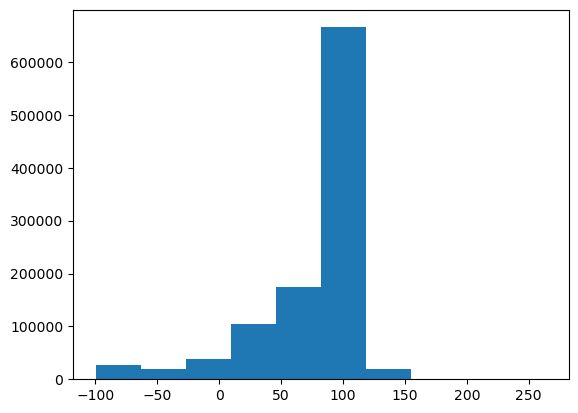

In [9]:
plt.hist(NCII["PERCENTGROWTH"])

In [ ]:
NCII["PERCENTGROWTH"]

In [4]:
labels = [1,2,3,4,5]
NCII["CONC1"] = pd.qcut(NCII["CONC1"], len(labels), labels=labels)
NCII["CONC2"] = pd.qcut(NCII["CONC2"], len(labels), labels=labels)
NCII["PERCENTGROWTH"] = pd.qcut(NCII["PERCENTGROWTH"], len(labels), labels=labels)


# [Tic-Tac-Toe](https://github.com/ubc-systopia/treeFarms/blob/main/experiments/datasets/tic-tac-toe/data.csv)

In [6]:
TicTacToe = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/TicTacToe.csv")

In [16]:
# Load the dataset
TicTacToe = pd.read_csv("/Users/simondn/Documents/RashomonActiveLearning/Data/raw/TicTacToe.csv")

# List of square columns to encode
square_columns = [
    "top-left-square", "top-middle-square", "top-right-square",
    "middle-left-square", "middle-middle-square", "middle-right-square",
    "bottom-left-square", "bottom-middle-square", "bottom-right-square"
]

# One-hot encode the square columns
TicTacToe = pd.get_dummies(TicTacToe, columns=square_columns, prefix=square_columns)
TicTacToe.rename(columns={'Class': 'Y'}, inplace=True)



In [17]:
with open('/Users/simondn/Documents/RashomonActiveLearning/Data/processed/TicTacToe.pkl', 'wb') as file:
        pickle.dump(TicTacToe, file)